# Reddit data

## TOC:
* [Analyzing data](#first-bullet)
* [Graphs](#second-bullet)
* [Filtering data](#third-bullet)
* [Selection of Robintrack stocks](#fourth-bullet)
* [Scraping data](#sixth-bullet)
* [Code vault below](#last-bullet)



## Analyzing data <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import datetime
import os
import time
import numpy as np

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

Merging seperately scraped csv files into one csv file. Only needs to be done once, file can be imported after.

In [ ]:
base_url = r"C:/Users/Ck0rt/Documents/Large files/School/MSc Finance & Investments/Thesis/Reddit/posts"

df = pd.DataFrame()

for root, dirs, files in os.walk(base_url):
    # Loop through all files in the current directory
    for file in files:
        path = os.path.join(root, file)
        print(path)
        # Check if the file is a CSV file
        if file.endswith('.csv'):
            # Append the CSV file to the dataframe
            df = df.append(pd.read_csv(path))

save_loc = base_url + "all_files.csv"

#SAVE IS OFF:
# df.to_csv(save_loc, header=True, index=False)


### Reading data from CSV file

In [294]:
path = r"C:\Users\Ck0rt\Documents\Large files\School\MSc Finance & Investments\Thesis\Reddit\all_files.csv"

df = pd.read_csv(path)

df['datetime'] = pd.to_datetime(df['created_utc'], unit='s')
df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

df

,author,created_utc,full_link,id,num_comments,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,url,datetime,date
0,vnnc,1523829188,https://www.reddit.com/r/investing/comments/8c...,8cikde,7,0,I am just reading this NYT article: https://ww...,investing,t5_2qhhq,511917,What will happen if war breaks out in Syria?,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:53:08,2018-04-15
1,brookswilliams,1523829011,https://www.reddit.com/r/investing/comments/8c...,8cijmx,14,2,Would there be greater returns in investing in...,investing,t5_2qhhq,511915,Investing in countries with high inflation,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:50:11,2018-04-15
2,xsvfatal,1523828498,https://www.reddit.com/r/investing/comments/8c...,8cihl8,3,0,Is there a way to tell what specific companies...,investing,t5_2qhhq,511915,Question about ETFs,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:41:38,2018-04-15
3,FreelanceFifty,1523828304,https://www.reddit.com/r/investing/comments/8c...,8cigt1,6,1,do I cut my losses?,investing,t5_2qhhq,511912,help i bought shopify at 190,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:38:24,2018-04-15
4,Wagamaga,1523826262,https://www.reddit.com/r/investing/comments/8c...,8ci8a8,0,1,https://industrytoday.co.uk/security/surveilla...,investing,t5_2qhhq,511901,Surveillance 2018 Global Market –The analysts ...,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:04:22,2018-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458050,iBuyOnlyFans666,1598425829,https://www.reddit.com/r/wallstreetbets/commen...,igua6a,0,1,NaN,wallstreetbets,t5_2th52,1434295,Join the Only Fans Content Discord Server!,https://discord.gg/ryameW,2020-08-26 07:10:29,2020-08-26
458051,waaaaaaaaaaaaaaahhhh,1598425697,https://www.reddit.com/r/wallstreetbets/commen...,igu97b,2,1,NaN,wallstreetbets,t5_2th52,1434296,My portfolio is small like my penis but it’s g...,https://i.redd.it/j2zanloqqaj51.jpg,2020-08-26 07:08:17,2020-08-26
458052,ObamaBetrayedUSA,1598425617,https://www.reddit.com/r/wallstreetbets/commen...,igu8nt,1,1,NaN,wallstreetbets,t5_2th52,1434290,INO call - Cut losses or hold out?,https://i.redd.it/vfody32iqaj51.jpg,2020-08-26 07:06:57,2020-08-26
458053,PeterMichaelPaints,1598425536,https://www.reddit.com/r/wallstreetbets/commen...,igu85p,0,1,[removed],wallstreetbets,t5_2th52,1434288,Gold is stupid. And screw bitcoin. If you buy ...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 07:05:36,2020-08-26


## Graphs <a class="anchor" id="second-bullet"></a>

##### Graph showing user growth on each subreddit.

<AxesSubplot:title={'center':'Total users on subreddit'}, xlabel='Date', ylabel='Users (in thousands)'>

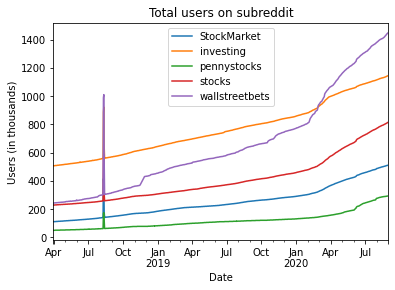

In [290]:
# Preparing data
count_series = df.groupby(['subreddit', 'datetime'])['subreddit_subscribers'].mean()
count_df = count_series.unstack(level=0)
count_df = count_df.rename_axis(None, axis=1).rename_axis(None).reset_index().rename(columns={'index': 'datetime'})
count_df = count_df.resample('d', on='datetime').mean().reset_index()

# Converting users to thousands
count_df.loc[:, count_df.columns != 'datetime'] = round(count_df.loc[:, count_df.columns != 'datetime']/1000, 0)

# Plotting graph for the following stocks
count_df.plot(kind = 'line', x = 'datetime', y = ['StockMarket', 'investing', 'pennystocks', 'stocks', 'wallstreetbets'],
                 title='Total users on subreddit', xlabel='Date', ylabel='Users (in thousands)')


The graph above shows a spike. This seems to be a fault in the data, but is not very relevant. This is data from 10 until the 12 of August 2018.

##### Graph showing weekly posts on each subreddit.

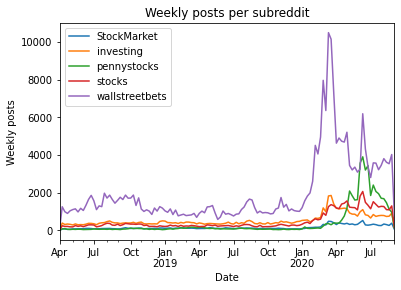

In [384]:
def graph_weekly_posts(df):
    # Preparing data
    count_series = df.groupby(['subreddit', 'datetime']).size()
    count_df = count_series.unstack(level=0)
    count_df = count_df.rename_axis(None, axis=1).rename_axis(None).reset_index().rename(columns={'index': 'datetime'})

    # Convert count to weekly
    count_df_weekly = count_df.resample('W', on='datetime').sum().reset_index()
    # print(count_df_weekly)


    # Plotting graph for the following stocks
    count_df_weekly.plot(kind = 'line', x = 'datetime', y = ['StockMarket', 'investing', 'pennystocks', 'stocks', 'wallstreetbets'],
                        title='Weekly posts per subreddit', xlabel='Date', ylabel='Weekly posts')
graph_weekly_posts(df)

##### Graph showing total amounts of comments on each subreddit.

<AxesSubplot:title={'center':'Total comments on subreddit posts'}, xlabel='Date', ylabel='Comments (in thousands)'>

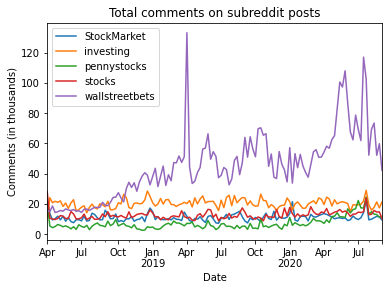

In [306]:
# Preparing data
count_series = df.groupby(['subreddit', 'datetime'])['num_comments'].sum()
count_df = count_series.unstack(level=0)

count_df = count_df.rename_axis(None, axis=1).rename_axis(None).reset_index().rename(columns={'index': 'datetime'})
count_df = count_df.resample('w', on='datetime').mean().reset_index()
count_df
# Converting users to thousands
# count_df.loc[:, count_df.columns != 'datetime'] = round(count_df.loc[:, count_df.columns != 'datetime']/1000, 0)

# Plotting graph for the following stocks
count_df.plot(kind = 'line', x = 'datetime', y = ['StockMarket', 'investing', 'pennystocks', 'stocks', 'wallstreetbets'],
                 title='Total comments on subreddit posts', xlabel='Date', ylabel='Comments (in thousands)')


## Filtering data <a class="anchor" id="third-bullet"></a>

Filtering out data with no selftext + saving the dataframe to csv.

Please note than save is turned of. Change to save = true is you wish to save the file. 
```python
save = False
```


In [12]:
save = False


path_old = r"C:\Users\Ck0rt\Documents\Large files\School\MSc Finance & Investments\Thesis\Reddit\all_files.csv"

# Opening original csv
df = pd.read_csv(path_old)

# Adding date time info
df['datetime'] = pd.to_datetime(df['created_utc'], unit='s')
df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')


# Filtering data
filtered_df = df[~df['selftext'].isin(["[deleted]", "[removed]", np.nan])]

if save:
    # Saving filtered csv
    path_new = r"C:\Users\Ck0rt\Documents\Large files\School\MSc Finance & Investments\Thesis\Reddit\filtered_df.csv"

    print("File saved")
    filtered_df.to_csv(path_new, header=True, index=False)


## Selection of Robintrack stocks <a class="anchor" id="fourth-bullet"></a>

**Stock selection method**

As the Robintrack dataset contains too many stocks, I will be selecting a few from this dataset.
I start of by filtering dataset by requiring more than 1000 average_users and more than 0 users as a starting value for a stock. I then merge the dataset from Robintrack with data on NASDAQ, NYSE and AMEX stocks from the Nasdaq website. This data contains info on the company name, country of origin and market cap. I end up with 1084 stocks.

- Link: https://www.nasdaq.com/market-activity/stocks/screener

Next, I count how often each of these stocks are mentioned **in the title of a Reddit post**. I believe this is the most accurate measure of the amount of mentions of a given post. For example, if I were to look at just comments, then a lot of valuable context (i.e. the title of the post where the comments are posted for example) would be lost. I order the stocks based on the amount of mentions they get and take the top 25 stocks (I also apply a filter saying that the market cap of the stocks needs to be > 1,000,000,000). I end up with the following stocks:

|1-5|6-10|11-15|16-20|21-25|
|---|---|---|---|---|
|TSLA|MU|SNAP|AMD|DIS|
|MSFT|AAPL|AMZN|SQ|BABA|
|V|NFLX|IQ|ATVI|SHOP|
|BA|NVDA|GE|WMT|SBUX|
|F|TLRY|LULU|BAC|GME



Loop through all stocks in the Robintrack data. Filtering these stocks based on 
- User count:
    - More than 1000 users on average during the sample period.
    - More than 0 users at the start of the sample period (to exclude listings which were added after the start of the sample period
- mention frequency of stocks in Reddit data

In [ ]:
# Start of by creating an overview of all available stocks in the Robintrack dataset. 
filedir = r"C:\Users\Ck0rt\Documents\Large files\School\MSc Finance & Investments\Thesis\Robintrack\popularity_export"

d = []



for filename in os.listdir(filedir):
    csv_path = os.path.join(filedir, filename)

    # checking if it is a file
    if os.path.isfile(csv_path):
        df = pd.read_csv(csv_path)
        print(f"Now analysing data for Robintrack file: {filename}")

        ticker = filename.split(".")[0]
        first_value = df['users_holding'].iloc[0]
        last_value = df['users_holding'].iloc[-1]
        average_users = df.users_holding.mean()

        d.append(
            {
                'Symbol': ticker,
                'first_value': first_value,
                'last_value': last_value,
                'average_users':  average_users
            }
        )
stock_stats_df = pd.DataFrame(d)

In [3]:
# Filter the dataframe by requiring more than 1000 average_users and more than 0 users as a starting value.
filtered_stock_stats_df = stock_stats_df[(stock_stats_df['first_value']>0) & (stock_stats_df['average_users']>1000)].reset_index()


In [23]:
# Merge the remain Robinhood stocks with the info from https://www.nasdaq.com/market-activity/stocks/screener
path = r"C:\Users\Ck0rt\Documents\Large files\School\MSc Finance & Investments\Thesis\Robintrack\NASDAQ_NYSE_AMEX.csv"
ticker_df = pd.read_csv(path)

ticker_df = ticker_df[['Symbol', 'Name', 'Country', 'Market Cap']]
ticker_df
ticker_df = pd.merge(ticker_df, filtered_stock_stats_df, on='Symbol', how='outer')
ticker_df = ticker_df.dropna().drop(['index'], axis=1).reset_index(drop=True)

save_path = r"C:\Users\Ck0rt\Documents\Large files\School\MSc Finance & Investments\Thesis\Reddit\stock_selection.csv"
ticker_df.to_csv(save_path, header=True, index=False)

#1084 stocks remain
ticker_df

,Symbol,Name,Country,Market Cap,first_value,last_value,average_users
0,A,Agilent Technologies Inc. Common Stock,United States,4.684010e+10,590.0,1642.0,1069.187611
1,AACG,ATA Creativity Global American Depositary Shares,China,4.643784e+07,55.0,1644.0,1329.366120
2,AAL,American Airlines Group Inc. Common Stock,United States,8.880896e+09,3755.0,637705.0,119157.089252
3,AAOI,Applied Optoelectronics Inc. Common Stock,United States,6.161123e+07,2711.0,1680.0,2199.701565
4,AAPL,Apple Inc. Common Stock,United States,2.566793e+12,150785.0,730774.0,256658.521322
...,...,...,...,...,...,...,...
1079,ZOM,Zomedica Corp. Common Shares,United States,1.904042e+08,79.0,55529.0,7612.210858
1080,ZS,Zscaler Inc. Common Stock,United States,1.792745e+10,1236.0,7379.0,4579.322855
1081,ZTO,ZTO Express (Cayman) Inc. American Depositary ...,China,2.159558e+10,433.0,2277.0,1163.312301
1082,ZTS,Zoetis Inc. Class A Common Stock,United States,7.235036e+10,588.0,2739.0,1352.861990


### Continuing with stock_selection.csv

In [7]:
path = r"C:\Users\Ck0rt\Documents\Large files\School\MSc Finance & Investments\Thesis\Reddit\stock_selection.csv"
ticker_df = pd.read_csv(path)

Next, the mention frequency in counted in the Reddit dataset.

In [13]:
def test(ticker=False):
    if ticker is False:
        print("FALSE")
    else:
        print("True")

test(ticker=True)

True


In [14]:
def mention_counter(df, ticker, case_sensitivity=False, company_name=False):
    
    if company_name:
        regex_filter = fr"\b[\$]?(?:{company_name}|{ticker})\b"
    else:
        regex_filter = fr"\${ticker}\b"
        
    case_sensitivity = case_sensitivity
    df = df[(df['title'].str.contains(regex_filter, case=case_sensitivity))|((df['selftext'].str.contains(regex_filter, case=case_sensitivity)))]
    
    mention_freq = df.shape[0]
    print(f"Found {mention_freq} comments for [{ticker}]")

    return mention_freq


In [15]:
mention_counter(filtered_df, 'a')

Found 20 comments for [a]


20

In [ ]:
d = []
for ticker in ticker_df['Symbol']:
    d.append(
        {
            'Symbol': ticker,
            'mention_freq': mention_counter(filtered_df, ticker)
        }
    )
mention_freq_df = pd.DataFrame(d)
mention_freq_df = mention_freq_df .merge(ticker_df, how='left', on='Symbol')

In [24]:
mention_freq_df[mention_freq_df['mention_freq']>100]
mention_freq_df.nlargest(25, 'mention_freq').merge(ticker_df, how='left', on='Symbol')


,Symbol,mention_freq,Name,Country,Market Cap,first_value,last_value,average_users
0,TSLA,892,Tesla Inc. Common Stock,United States,5.126927e+11,81038.0,563621.0,164488.208333
1,MU,532,Micron Technology Inc. Common Stock,United States,6.104636e+10,57873.0,55695.0,57853.666650
2,MSFT,432,Microsoft Corporation Common Stock,United States,1.937939e+12,112514.0,653838.0,251403.196513
3,AMD,367,Advanced Micro Devices Inc. Common Stock,United States,1.184559e+11,128212.0,264849.0,172755.429330
4,AAPL,361,Apple Inc. Common Stock,United States,2.566793e+12,150785.0,730774.0,256658.521322
5,DIS,353,Walt Disney Company (The) Common Stock,United States,1.737792e+11,59936.0,598367.0,211314.900233
6,AMZN,348,Amazon.com Inc. Common Stock,United States,9.502161e+11,72491.0,427973.0,138302.018627
7,SNAP,316,Snap Inc. Class A Common Stock,United States,1.606649e+10,73212.0,350278.0,170015.455999
8,BABA,227,Alibaba Group Holding Limited American Deposit...,China,2.461679e+11,75802.0,255110.0,127852.088757
9,NFLX,218,Netflix Inc. Common Stock,United States,1.462738e+11,78192.0,236819.0,112068.607488


In [19]:
def mention_counter_titleonly(df, ticker, case_sensitivity=False, company_name=False):
    
    if company_name:
        regex_filter = fr"\b[\$]?(?:{company_name}|{ticker})\b"
    else:
        regex_filter = fr"\${ticker}\b"
        
    case_sensitivity = case_sensitivity
    df = df[df['title'].str.contains(regex_filter, case=case_sensitivity)]
    
    mention_freq = df.shape[0]
    print(f"Found {mention_freq} comments for [{ticker}]")

    return mention_freq

In [ ]:
d = []
for ticker in ticker_df['Symbol']:
    d.append(
        {
            'Symbol': ticker,
            'mention_freq': mention_counter_titleonly(filtered_df, ticker)
        }
    )
mention_freq_titleonly_df = pd.DataFrame(d)
mention_freq_titleonly_df = mention_freq_titleonly_df.merge(ticker_df, how='left', on='Symbol')

In [34]:
mention_freq_titleonly_df.nlargest(25, 'mention_freq')

,Symbol,mention_freq,Name,Country,Market Cap,first_value,last_value,average_users
964,TSLA,463,Tesla Inc. Common Stock,United States,5.126927e+11,81038.0,563621.0,164488.208333
647,MU,314,Micron Technology Inc. Common Stock,United States,6.104636e+10,57873.0,55695.0,57853.666650
875,SNAP,191,Snap Inc. Class A Common Stock,United States,1.606649e+10,73212.0,350278.0,170015.455999
58,AMD,175,Advanced Micro Devices Inc. Common Stock,United States,1.184559e+11,128212.0,264849.0,172755.429330
302,DIS,174,Walt Disney Company (The) Common Stock,United States,1.737792e+11,59936.0,598367.0,211314.900233
639,MSFT,162,Microsoft Corporation Common Stock,United States,1.937939e+12,112514.0,653838.0,251403.196513
4,AAPL,150,Apple Inc. Common Stock,United States,2.566793e+12,150785.0,730774.0,256658.521322
65,AMZN,133,Amazon.com Inc. Common Stock,United States,9.502161e+11,72491.0,427973.0,138302.018627
894,SQ,113,Block Inc. Class A Common Stock,United States,4.263649e+10,55730.0,118574.0,79851.014176
114,BABA,112,Alibaba Group Holding Limited American Deposit...,China,2.461679e+11,75802.0,255110.0,127852.088757


**Stock selection method**
As the Robintrack dataset contains too many stocks, I will be selecting a few from this dataset.
I start of by filtering dataset by requiring more than 1000 average_users and more than 0 users as a starting value for a stock. I then merge the dataset from Robintrack with data on NASDAQ, NYSE and AMEX stocks from the Nasdaq website. This data contains info on the company name, country of origin and market cap. I end up with 1084 stocks.

- Link: https://www.nasdaq.com/market-activity/stocks/screener

Next, I count how often each of these stocks are mentioned **in the title of a Reddit post**. I believe this is the most accurate measure of the amount of mentions of a given post. For example, if I were to look at just comments, then a lot of valuable context (i.e. the title of the post where the comments are posted for example) would be lost. I order the stocks based on the amount of mentions they get and take the top 25 stocks (I also apply a filter saying that the market cap of the stocks needs to be > 1,000,000,000). I end up with the following stocks:

|1-5|6-10|11-15|16-20|21-25|
|---|---|---|---|---|
|TSLA|MU|SNAP|AMD|DIS|
|MSFT|AAPL|AMZN|SQ|BABA|
|V|NFLX|IQ|ATVI|SHOP|
|BA|NVDA|GE|WMT|SBUX|
|F|TLRY|LULU|BAC|GME



In [43]:
# mention_freq_titleonly_df.nlargest(25, 'mention_freq').merge(ticker_df, how='left', on='Symbol')
# mention_freq_titleonly_df.nlargest(25, 'mention_freq')

results_df = mention_freq_titleonly_df[mention_freq_titleonly_df['Market Cap'] > 1000000000].nlargest(25, 'mention_freq')
list = results_df['Symbol'].tolist()
list

['TSLA',
 'MU',
 'SNAP',
 'AMD',
 'DIS',
 'MSFT',
 'AAPL',
 'AMZN',
 'SQ',
 'BABA',
 'V',
 'NFLX',
 'IQ',
 'ATVI',
 'SHOP',
 'BA',
 'NVDA',
 'GE',
 'WMT',
 'SBUX',
 'F',
 'TLRY',
 'LULU',
 'BAC',
 'GME']

,author,created_utc,full_link,id,num_comments,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,url,datetime,date
12,Boomroomguy,1523806734,https://www.reddit.com/r/investing/comments/8c...,8cfwfg,12,0,Last year was the first time in my life had ex...,investing,t5_2qhhq,511798,How stable are Vanguard accounts?,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 15:38:54,2018-04-15
96,haxamin,1523621833,https://www.reddit.com/r/investing/comments/8b...,8byp4w,7,6,https://www.wsj.com/articles/silicon-valley-lo...,investing,t5_2qhhq,511246,Silicon Valley Powered American Tech Dominance...,https://www.reddit.com/r/investing/comments/8b...,2018-04-13 12:17:13,2018-04-13
200,Timelapze,1522691994,https://www.reddit.com/r/investing/comments/89...,892e8d,24,7,When the S&amp;P500 takes a dive at the hands ...,investing,t5_2qhhq,507476,Holding an S&amp;P500 fund opens you up to an ...,https://www.reddit.com/r/investing/comments/89...,2018-04-02 17:59:54,2018-04-02
451,encantadopordali,1524851327,https://www.reddit.com/r/investing/comments/8f...,8fdlor,3,3,"Re my title, virtually all big US listed compa...",investing,t5_2qhhq,515615,Recent US corporate earnings beats due to tax ...,https://www.reddit.com/r/investing/comments/8f...,2018-04-27 17:48:47,2018-04-27
460,Kunu2,1524841050,https://www.reddit.com/r/investing/comments/8f...,8fc9xa,14,12,Nope. The market does not seem to appreciate t...,investing,t5_2qhhq,515581,"Positive GDP Revision, Korean War Ending and D...",https://www.reddit.com/r/investing/comments/8f...,2018-04-27 14:57:30,2018-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457665,IWasRightOnce,1598542241,https://www.reddit.com/r/wallstreetbets/commen...,ihn4nd,10,1,The retail giant confirmed to CNBC that it’s i...,wallstreetbets,t5_2th52,1439712,Walmart teaming up with Microsoft in bid for T...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-27 15:30:41,2020-08-27
457697,Ziberian,1598540881,https://www.reddit.com/r/wallstreetbets/commen...,ihmpne,3,1,Does anybody else feel like they literally nev...,wallstreetbets,t5_2th52,1439590,"To Sell, Or Not To Sell",https://www.reddit.com/r/wallstreetbets/commen...,2020-08-27 15:08:01,2020-08-27
457810,patrickbateman02,1597156739,https://www.reddit.com/r/wallstreetbets/commen...,i7sz48,20,1,No one does zoom parties anymore. Never paid f...,wallstreetbets,t5_2th52,1403007,Fuck zoom!!,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-11 14:38:59,2020-08-11
457835,spacedinosaur12,1597155280,https://www.reddit.com/r/wallstreetbets/commen...,i7skoh,32,1,[position](https://m.imgur.com/gallery/OJUqD96...,wallstreetbets,t5_2th52,1402978,ETSY 9/18 160c YOLO Loss,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-11 14:14:40,2020-08-11


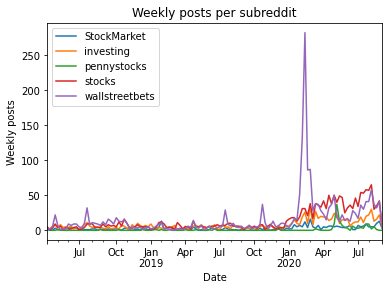

In [418]:
regex_filter = '[$]*microsoft|[$]*msft'
case_sensitivity = False
mentioned_df = filtered_df[(filtered_df['title'].str.contains(regex_filter, case=case_sensitivity))|((filtered_df['selftext'].str.contains(regex_filter, case=case_sensitivity)))]
graph_weekly_posts(mentioned_df)
mentioned_df

,author,created_utc,full_link,id,num_comments,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,url,datetime,date
163,el_spidermonkey,1522725419,https://www.reddit.com/r/investing/comments/89...,898p8x,7,3,OLED has dropped 43% in the past three months ...,investing,t5_2qhhq,507760,OLED: Buy That Dip?,https://www.reddit.com/r/investing/comments/89...,2018-04-03 03:16:59,2018-04-03
200,Timelapze,1522691994,https://www.reddit.com/r/investing/comments/89...,892e8d,24,7,When the S&amp;P500 takes a dive at the hands ...,investing,t5_2qhhq,507476,Holding an S&amp;P500 fund opens you up to an ...,https://www.reddit.com/r/investing/comments/89...,2018-04-02 17:59:54,2018-04-02
204,Gareth321,1522691301,https://www.reddit.com/r/investing/comments/89...,8926rd,69,56,https://www.bloomberg.com/news/articles/2018-0...,investing,t5_2qhhq,507474,Breaking on Bloomberg: Apple to move away from...,https://www.reddit.com/r/investing/comments/89...,2018-04-02 17:48:21,2018-04-02
240,trulytrulyisay,1522633918,https://www.reddit.com/r/investing/comments/88...,88vw7q,13,18,I’m curious to know of executives in the past ...,investing,t5_2qhhq,507103,Have there ever been company executives so suc...,https://www.reddit.com/r/investing/comments/88...,2018-04-02 01:51:58,2018-04-02
350,sirloinfurr,1523464385,https://www.reddit.com/r/investing/comments/8b...,8big80,0,4,https://finance.yahoo.com/news/india-apos-flip...,investing,t5_2qhhq,510637,India's Flipkart May Be the Latest Battlegroun...,https://www.reddit.com/r/investing/comments/8b...,2018-04-11 16:33:05,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457971,spauldingzero,1598450187,https://www.reddit.com/r/wallstreetbets/commen...,igz9wt,8,1,Never seen a split happen for calls I was hold...,wallstreetbets,t5_2th52,1434832,How will calls be affected for the Tesla and A...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 13:56:27,2020-08-26
457989,starwarscapital,1598448444,https://www.reddit.com/r/wallstreetbets/commen...,igysi6,89,1,"Maybe I am psychic, or maybe I am a retard. Bu...",wallstreetbets,t5_2th52,1434783,I Can Feel The Apple Post Split FOMO &amp; Fee...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 13:27:24,2020-08-26
458022,M_lotta,1598437426,https://www.reddit.com/r/wallstreetbets/commen...,igwcux,60,1,"Hey guys, just wanted any advice relating to m...",wallstreetbets,t5_2th52,1434517,$TSLA &amp; $AAPL Calls,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 10:23:46,2020-08-26
458027,bluechiphookahs,1598434218,https://www.reddit.com/r/wallstreetbets/commen...,igvrdq,10,1,End of the week run to the split- who else nee...,wallstreetbets,t5_2th52,1434465,🍎 to the 🌙 🚀 🚀 🚀,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 09:30:18,2020-08-26


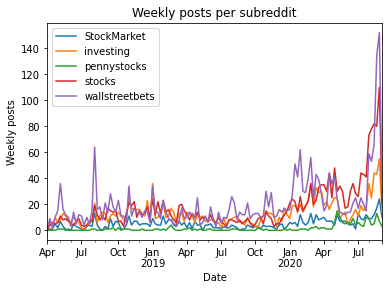

In [387]:
regex_filter = '[$]*aapl|[$]*apple'
case_sensitivity = False
mentioned_df = filtered_df[(filtered_df['title'].str.contains(regex_filter, case=case_sensitivity))|((filtered_df['selftext'].str.contains(regex_filter, case=case_sensitivity)))]
graph_weekly_posts(mentioned_df)
mentioned_df

In [421]:
filtered_df

,author,created_utc,full_link,id,num_comments,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,url,datetime,date
0,vnnc,1523829188,https://www.reddit.com/r/investing/comments/8c...,8cikde,7,0,I am just reading this NYT article: https://ww...,investing,t5_2qhhq,511917,What will happen if war breaks out in Syria?,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:53:08,2018-04-15
1,brookswilliams,1523829011,https://www.reddit.com/r/investing/comments/8c...,8cijmx,14,2,Would there be greater returns in investing in...,investing,t5_2qhhq,511915,Investing in countries with high inflation,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:50:11,2018-04-15
2,xsvfatal,1523828498,https://www.reddit.com/r/investing/comments/8c...,8cihl8,3,0,Is there a way to tell what specific companies...,investing,t5_2qhhq,511915,Question about ETFs,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:41:38,2018-04-15
3,FreelanceFifty,1523828304,https://www.reddit.com/r/investing/comments/8c...,8cigt1,6,1,do I cut my losses?,investing,t5_2qhhq,511912,help i bought shopify at 190,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:38:24,2018-04-15
4,Wagamaga,1523826262,https://www.reddit.com/r/investing/comments/8c...,8ci8a8,0,1,https://industrytoday.co.uk/security/surveilla...,investing,t5_2qhhq,511901,Surveillance 2018 Global Market –The analysts ...,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:04:22,2018-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458037,SebastianPatel,1598430902,https://www.reddit.com/r/wallstreetbets/commen...,igv6n2,56,1,I recently learned from a WSB poster that Inte...,wallstreetbets,t5_2th52,1434405,Trading after-hours key advantage,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 08:35:02,2020-08-26
458039,johnnygobbs1,1598430584,https://www.reddit.com/r/wallstreetbets/commen...,igv4o5,2,1,before my loanshark breaks my legs if these AA...,wallstreetbets,t5_2th52,1434396,I just want to say one thing...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 08:29:44,2020-08-26
458042,Bookling-,1598428767,https://www.reddit.com/r/wallstreetbets/commen...,igut4v,1,1,can anyone provide me any reason why NOT to pu...,wallstreetbets,t5_2th52,1434356,USAU for a gold/mineral stock,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 07:59:27,2020-08-26
458045,mrsimbau,1598427215,https://www.reddit.com/r/wallstreetbets/commen...,iguj6m,20,1,[https://www.cnbc.com/2020/08/25/american-air...,wallstreetbets,t5_2th52,1434323,What do you guys think about American Airline ...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 07:33:35,2020-08-26


In [428]:
regex_filter = r"\b[\$]?(?:apple|aapl)\b"
case_sensitivity = False
mentioned_df = filtered_df[(filtered_df['title'].str.contains(regex_filter, case=case_sensitivity))|((filtered_df['selftext'].str.contains(regex_filter, case=case_sensitivity)))]
# graph_weekly_posts(mentioned_df)
mentioned_df


,author,created_utc,full_link,id,num_comments,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,url,datetime,date
163,el_spidermonkey,1522725419,https://www.reddit.com/r/investing/comments/89...,898p8x,7,3,OLED has dropped 43% in the past three months ...,investing,t5_2qhhq,507760,OLED: Buy That Dip?,https://www.reddit.com/r/investing/comments/89...,2018-04-03 03:16:59,2018-04-03
200,Timelapze,1522691994,https://www.reddit.com/r/investing/comments/89...,892e8d,24,7,When the S&amp;P500 takes a dive at the hands ...,investing,t5_2qhhq,507476,Holding an S&amp;P500 fund opens you up to an ...,https://www.reddit.com/r/investing/comments/89...,2018-04-02 17:59:54,2018-04-02
204,Gareth321,1522691301,https://www.reddit.com/r/investing/comments/89...,8926rd,69,56,https://www.bloomberg.com/news/articles/2018-0...,investing,t5_2qhhq,507474,Breaking on Bloomberg: Apple to move away from...,https://www.reddit.com/r/investing/comments/89...,2018-04-02 17:48:21,2018-04-02
240,trulytrulyisay,1522633918,https://www.reddit.com/r/investing/comments/88...,88vw7q,13,18,I’m curious to know of executives in the past ...,investing,t5_2qhhq,507103,Have there ever been company executives so suc...,https://www.reddit.com/r/investing/comments/88...,2018-04-02 01:51:58,2018-04-02
424,ziadmiqdadi,1523335130,https://www.reddit.com/r/investing/comments/8b...,8b50z5,1,0,They’re at an all year low and show promise fo...,investing,t5_2qhhq,510126,(STOCK)Thoughts on Cirrus Logic?,https://www.reddit.com/r/investing/comments/8b...,2018-04-10 04:38:50,2018-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457971,spauldingzero,1598450187,https://www.reddit.com/r/wallstreetbets/commen...,igz9wt,8,1,Never seen a split happen for calls I was hold...,wallstreetbets,t5_2th52,1434832,How will calls be affected for the Tesla and A...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 13:56:27,2020-08-26
457989,starwarscapital,1598448444,https://www.reddit.com/r/wallstreetbets/commen...,igysi6,89,1,"Maybe I am psychic, or maybe I am a retard. Bu...",wallstreetbets,t5_2th52,1434783,I Can Feel The Apple Post Split FOMO &amp; Fee...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 13:27:24,2020-08-26
458022,M_lotta,1598437426,https://www.reddit.com/r/wallstreetbets/commen...,igwcux,60,1,"Hey guys, just wanted any advice relating to m...",wallstreetbets,t5_2th52,1434517,$TSLA &amp; $AAPL Calls,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 10:23:46,2020-08-26
458027,bluechiphookahs,1598434218,https://www.reddit.com/r/wallstreetbets/commen...,igvrdq,10,1,End of the week run to the split- who else nee...,wallstreetbets,t5_2th52,1434465,🍎 to the 🌙 🚀 🚀 🚀,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 09:30:18,2020-08-26


In [432]:

ticker = r"aapl"
regex_filter = fr"\b[\$]?(?:{ticker})\b"
case_sensitivity = False
mentioned_df = filtered_df[(filtered_df['title'].str.contains(regex_filter, case=case_sensitivity))|((filtered_df['selftext'].str.contains(regex_filter, case=case_sensitivity)))]
# graph_weekly_posts(mentioned_df)
mentioned_df


,author,created_utc,full_link,id,num_comments,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,url,datetime,date
851,youbetterdont,1523112822,https://www.reddit.com/r/investing/comments/8a...,8aij7w,19,166,"I’m starting to dig more into financials, but ...",investing,t5_2qhhq,509156,ELI5 the equity section of a balance sheet,https://www.reddit.com/r/investing/comments/8a...,2018-04-07 14:53:42,2018-04-07
994,brereddit,1524602608,https://www.reddit.com/r/investing/comments/8e...,8ensl7,14,0,My question is based solely on the current PE ...,investing,t5_2qhhq,514798,Why is the S&amp;P Index PE ratio higher than ...,https://www.reddit.com/r/investing/comments/8e...,2018-04-24 20:43:28,2018-04-24
1238,ElectronicGold,1523955407,https://www.reddit.com/r/investing/comments/8c...,8cv489,129,34,"Microsoft, Apple, Google, and Amazon are neck ...",investing,t5_2qhhq,512425,Microsoft ($725.09 B) just surpassed Alphabet/...,https://www.reddit.com/r/investing/comments/8c...,2018-04-17 08:56:47,2018-04-17
1303,HoyaSaxons,1524341085,https://www.reddit.com/r/investing/comments/8d...,8dy7zd,7,0,Can anyone explain what happened on Friday? Pa...,investing,t5_2qhhq,513848,Understanding market activity,https://www.reddit.com/r/investing/comments/8d...,2018-04-21 20:04:45,2018-04-21
1314,Crossfit22,1524329466,https://www.reddit.com/r/investing/comments/8d...,8dwyc3,7,0,Thank you for taking the time to read my post ...,investing,t5_2qhhq,513798,ETFs/Equities,https://www.reddit.com/r/investing/comments/8d...,2018-04-21 16:51:06,2018-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457407,cheukdong,1597991222,https://www.reddit.com/r/wallstreetbets/commen...,idrli8,20,1,Haven't seen anyone talk about this yet assumi...,wallstreetbets,t5_2th52,1419316,DELL earnings next week + VMWare valuation,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-21 06:27:02,2020-08-21
457475,jdfic,1597175282,https://www.reddit.com/r/wallstreetbets/commen...,i7yo4y,73,1,The DXY is reversing. Gold and silver plumeted...,wallstreetbets,t5_2th52,1403359,Why are the markets selling off?,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-11 19:48:02,2020-08-11
457989,starwarscapital,1598448444,https://www.reddit.com/r/wallstreetbets/commen...,igysi6,89,1,"Maybe I am psychic, or maybe I am a retard. Bu...",wallstreetbets,t5_2th52,1434783,I Can Feel The Apple Post Split FOMO &amp; Fee...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 13:27:24,2020-08-26
458022,M_lotta,1598437426,https://www.reddit.com/r/wallstreetbets/commen...,igwcux,60,1,"Hey guys, just wanted any advice relating to m...",wallstreetbets,t5_2th52,1434517,$TSLA &amp; $AAPL Calls,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 10:23:46,2020-08-26


In [ ]:
for text in mentioned_df['full_link']:
    print(text)
    print("-----------------------------------------------------------")



In [318]:
text = None
if text in ("[removed]", "", None):
    print("yes")
else:
    print("NOO")

yes


## Scraping data <a class="anchor" id="sixth-bullet"></a>

### Posts

In [ ]:
import datetime as dt
import time
from dateutil.relativedelta import relativedelta

import pandas as pd
import praw
from pmaw import PushshiftAPI
api = PushshiftAPI(num_workers=10)
# api_praw = PushshiftAPI(praw=reddit)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

from pathlib import Path
import os.path

In [ ]:
save = False

if save:
    # Directory where Reddit data is saved
    reddit_dir = r"C:/Users/Ck0rt/Documents/Large files/School/MSc Finance & Investments/Thesis/Reddit/posts"

    # Starting datetime
    start_date = dt.datetime(2018, 4, 1, 0, 0)
    end_date = dt.datetime(2020, 9, 1, 0, 0)

    subreddits = ['wallstreetbets', 'stocks', 'investing', 'stockmarket', 'pennystocks']

    for subreddit in subreddits:
        # Create folder to save output
        folder_loc = os.path.join(reddit_dir, subreddit).replace('\\', '/')
        print(folder_loc)
        Path(folder_loc).mkdir(parents=True, exist_ok=True)

        date_time = start_date
        while date_time < end_date:
            # Create 1 month search period in epoch time
            year_and_month = date_time.strftime('%Y_%m')
            start = int(date_time.timestamp())
            end = date_time + relativedelta(months=1)
            end = int(end.timestamp())

            # Create file to save output
            file_loc = os.path.join(folder_loc, year_and_month).replace('\\', '/') + ".csv"

            # Check if file already exists and skip API request if file exists
            if os.path.isfile(file_loc):
                print(f"File exists: [{file_loc}]")
                date_time = date_time + relativedelta(months=1)

                continue

            # Api cooldown time
            time.sleep(3)
            print(f"Now collecting data for [{subreddit}] in [{date_time.strftime('%B %Y')}]")

            # Request data from Pushshift
            start_time = time.time()
            posts = api.search_submissions(subreddit=subreddit, limit=300000, after=start, before=end)
            print(f'Retrieved {len(posts)} posts from Pushshift in [{time.time() - start_time}] seconds')

            # Save output to CSV via dataframe
            reddit_df = pd.DataFrame(posts)

            columns = ['author', 'created_utc', 'full_link', 'id', 'num_comments', 'score', 'selftext',
                       'subreddit', 'subreddit_id', 'subreddit_subscribers', 'title', 'url']
            reddit_df.to_csv(file_loc, header=True, index=False, columns=columns)
            print(f"Saving csv at [{file_loc}]")

            # Adding 1 month to date_time tracker
            date_time = date_time + relativedelta(months=1)


##### Filter

In [3]:
def fxn(item):
    if 'selftext' not in item:
        print("[selftest] is missing")
        return False
    
#     for key in item:
#         print(type(item[key]))
#         print(f"{key} --- {item[key]} + {type(item[key])}")
    
    rules = [item['score'] > -100,
             item['num_comments'] > 0,
             item['selftext'] not in ("[removed]", "")]
    
    return all(rules)

In [4]:
def test(a, b, c):

    rules = [a == 1,
             b in (10, 11),
             c > 25]

    
    return all(rules)

test(1, 12, 26)

False

### Comments

In [45]:
path = r"C:\Users\Ck0rt\Documents\Large files\School\MSc Finance & Investments\Thesis\Reddit\filtered_df.csv"
comments_df = pd.read_csv(path)


In [46]:
stock_list = ['TSLA','MU','SNAP','AMD','DIS',
              'MSFT','AAPL','AMZN','SQ','BABA',
              'V','NFLX','IQ','ATVI','SHOP',
              'BA','NVDA','GE','WMT','SBUX',
              'F','TLRY','LULU','BAC','GME']

In [ ]:
# Todo: filter posts which contain keyword
comments_df = comments_df['']

In [47]:
comments_df

,author,created_utc,full_link,id,num_comments,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,url,datetime,date
0,vnnc,1523829188,https://www.reddit.com/r/investing/comments/8c...,8cikde,7,0,I am just reading this NYT article: https://ww...,investing,t5_2qhhq,511917,What will happen if war breaks out in Syria?,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:53:08,2018-04-15
1,brookswilliams,1523829011,https://www.reddit.com/r/investing/comments/8c...,8cijmx,14,2,Would there be greater returns in investing in...,investing,t5_2qhhq,511915,Investing in countries with high inflation,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:50:11,2018-04-15
2,xsvfatal,1523828498,https://www.reddit.com/r/investing/comments/8c...,8cihl8,3,0,Is there a way to tell what specific companies...,investing,t5_2qhhq,511915,Question about ETFs,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:41:38,2018-04-15
3,FreelanceFifty,1523828304,https://www.reddit.com/r/investing/comments/8c...,8cigt1,6,1,do I cut my losses?,investing,t5_2qhhq,511912,help i bought shopify at 190,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:38:24,2018-04-15
4,Wagamaga,1523826262,https://www.reddit.com/r/investing/comments/8c...,8ci8a8,0,1,https://industrytoday.co.uk/security/surveilla...,investing,t5_2qhhq,511901,Surveillance 2018 Global Market –The analysts ...,https://www.reddit.com/r/investing/comments/8c...,2018-04-15 21:04:22,2018-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222489,SebastianPatel,1598430902,https://www.reddit.com/r/wallstreetbets/commen...,igv6n2,56,1,I recently learned from a WSB poster that Inte...,wallstreetbets,t5_2th52,1434405,Trading after-hours key advantage,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 08:35:02,2020-08-26
222490,johnnygobbs1,1598430584,https://www.reddit.com/r/wallstreetbets/commen...,igv4o5,2,1,before my loanshark breaks my legs if these AA...,wallstreetbets,t5_2th52,1434396,I just want to say one thing...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 08:29:44,2020-08-26
222491,Bookling-,1598428767,https://www.reddit.com/r/wallstreetbets/commen...,igut4v,1,1,can anyone provide me any reason why NOT to pu...,wallstreetbets,t5_2th52,1434356,USAU for a gold/mineral stock,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 07:59:27,2020-08-26
222492,mrsimbau,1598427215,https://www.reddit.com/r/wallstreetbets/commen...,iguj6m,20,1,[https://www.cnbc.com/2020/08/25/american-air...,wallstreetbets,t5_2th52,1434323,What do you guys think about American Airline ...,https://www.reddit.com/r/wallstreetbets/commen...,2020-08-26 07:33:35,2020-08-26


## ***Code vault below*** <a class="anchor" id="last-bullet"></a>

In [1]:
import datetime as dt
import pandas as pd
from pmaw import PushshiftAPI
api = PushshiftAPI(num_workers=10)
# api_praw = PushshiftAPI(praw=reddit)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [2]:
start = int(dt.datetime(2021,1,2,0,0).timestamp())
end = int(dt.datetime(2021,1,3,0,0).timestamp())


In [5]:
subreddit="wallstreetbets"
limit=10000

# comments = api.search_submissions(subreddit="wallstreetbets", limit=limit, after=start, before=end, filter_fn=fxn)
# comments = api.search_submissions(subreddit="wallstreetbets", limit=limit, after=start, before=end)

comments = api.search_comments(subreddit=subreddit, limit=limit, after=start, before=end)

print(f'Retrieved {len(comments)} posts from Pushshift')
comments_df = pd.DataFrame(comments)


Retrieved 10000 posts from Pushshift


In [7]:
# preview the comments data
# comments_df2 = list(comments_df.columns)

list(comments_df.columns)
# comments_df[['id', 'selftext']].iloc[:400]
comments_df[['id', 'body']].iloc[:400]

,id,body
0,ghsl4fv,**I am a bot. Is this submission violating the...
1,ghsl4dp,"sold shares, bought march call. ive been trimm..."
2,ghsl4az,Wth i can barely see it with all the cars in t...
3,ghsl496,What in the hell? I remember seeing this stock...
4,ghsl3yx,No ragrets
5,ghsl3qy,No it’s an ev play like AAPL
6,ghsl3mh,"That makes sense, and I’ll check out the video..."
7,ghsl381,At least you didn't refuse to take a phonecall...
8,ghsl32y,Hurr durr deep state
9,ghsl2y2,That works in a “well you made your choice now...


In [15]:
new_df = comments_df.filter(['media_only', 'full_link', 'id', 'title', 'author', 'created_utc', 'selftext', 'id','score', 'num_comments', 'link_id'], axis=1)
for link in new_df['full_link'].iloc[:20]:
    print(link)
for link in new_df['selftext'].iloc[:20]:
    print(link)
new_df.head(20)


TypeError: string indices must be integers

In [16]:
new_df.head(10)
list(comments_df.columns)

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'pwls',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 '

In [ ]:
subreddit="wallstreetbets"
limit=10000

comment_ids = api.search_submission_comment_ids(ids=['kor4w8'], subreddit="wallstreetbets", limit=limit, after=start, before=end)
test_df = pd.DataFrame(comments)


In [ ]:
test_df.head(10)

In [ ]:
subreddits = ['shortscarystories']
start_year = 2020
end_year = 2021
# directory on which to store the data
basecorpus = './my-dataset/'

In [88]:
comments = api_praw.search_comments(q="quantum", subreddit="science", limit=100, before=1629990795)
print(f'Retrieved {len(comments)} comments from Reddit?')


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 100 comments from Reddit?


In [91]:
posts = reddit.subreddit("all").search("keywords")



In [ ]:
# Iterate over the resulting posts and print their titles
for post in posts:
    print(post.title)
    print(post.selftext)

In [74]:
print(len(comments))

0


In [22]:
print(reddit.read_only)
for submission in reddit.subreddit("wallstreetbetts").hot(limit=10):
    print(submission.title)
    print(submission.score)

True
CLOV the next big squeeze? 148% short intrest is extreme!
39
$CLOV has 148% short intrest. identical to $GME in jan. its just as extreme as gamestop, can the merry band of fucktards band together and get the sqeezeable to sqozen? i like the stonk! whos with me? #$CLOV
14
$NOK GOT THEM SHORTS BY THE BALLS #SHORTSQUEEZE
2
$NOK IN A SHORT SQUEEZE
1
$NOK GOT THE SHORTS IN A SQUEEZE
0
Mining doge and litecoin!!! Excited about the future.
1
$$$$$ OWCP
5
Help Needed
1
Wtf is going on?? AMC GME NOK BB NKD are all falling?
4
Someone do a s5, ep17 of the Simpsons 'Bart Gets an Elephant.' Vs. GME. PLEASE
1


In [15]:
comments_df = pd.DataFrame(comments)
# preview the comments data
comments_df.head(5)

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,author_cakeday
0,[],None,Connortbh,None,None,[],None,None,None,text,...,1607317138,1,True,False,wallstreetbets,t5_2th52,None,0,[],NaN
1,[],None,KingSkegnesss,None,None,[],None,None,None,text,...,1607317138,1,True,False,wallstreetbets,t5_2th52,None,0,[],NaN
2,[],None,vladvash,None,None,[],None,None,None,text,...,1607317136,1,True,False,wallstreetbets,t5_2th52,None,0,[],NaN
3,[],None,PayPerTrade,None,None,[],None,None,None,text,...,1607317136,1,True,False,wallstreetbets,t5_2th52,None,0,[],NaN
4,[],None,FeistyTortoise,,None,"[{'e': 'text', 't': '201031:3:1'}]",None,201031:3:1,dark,richtext,...,1607317133,-9,True,False,wallstreetbets,t5_2th52,None,0,[],NaN
